# Load the libraries

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Don't forget to turn on plotting display in the notebook.
%matplotlib inline 

C:\Users\Samson\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Load the data

In [7]:
boston = datasets.load_boston()

In [10]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [5]:
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df['target'] = boston['target']

In [8]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='|S7')

In [5]:
df.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
74,0.07896,0.0,12.83,0.0,0.4370,6.273,6.0,4.2515,5.0,398.0,18.7,394.92,6.78,24.1
346,0.06162,0.0,4.39,0.0,0.4420,5.898,52.3,8.0136,3.0,352.0,18.8,364.61,12.67,17.2
343,0.02543,55.0,3.78,0.0,0.4840,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18,23.9
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66,19.5
404,41.52920,0.0,18.10,0.0,0.6930,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38,8.5
410,51.13580,0.0,18.10,0.0,0.5970,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
282,0.06129,20.0,3.33,1.0,0.4429,7.645,49.7,5.2119,5.0,216.0,14.9,377.07,3.01,46.0
212,0.21719,0.0,10.59,1.0,0.4890,5.807,53.8,3.6526,4.0,277.0,18.6,390.94,16.03,22.4
92,0.04203,28.0,15.04,0.0,0.4640,6.442,53.6,3.6659,4.0,270.0,18.2,395.01,8.16,22.9


# Create X (matrix) and y (vector)

In [6]:
features = boston['feature_names']
X = df[features]
y = df['target']

In [7]:
X.shape

(506, 13)

In [8]:
y.shape

(506,)

# Basic model with sklearn

### Create test and training set

In [11]:
# Split the original dataframe into train and test
df_train = df.sample(400).copy()
df_test = df[~df.index.isin(df_train.index)].copy()

In [12]:
# Create X_test, y_test, X_train, y_train

X_test = df_test[features]
y_test = df_test['target']

X_train = df_train[features]
y_train = df_train['target']

### Fit/train the model

In [17]:
lr = linear_model.LinearRegression()

In [20]:
lr.coef_

array([-9.59291466e-02,  4.51290518e-02,  6.04907986e-02,  2.34045322e+00,
       -1.63877435e+01,  4.03167402e+00,  6.16649575e-03, -1.31910080e+00,
        2.89867282e-01, -1.24837887e-02, -9.83266815e-01,  9.38145647e-03,
       -5.50591112e-01])

In [19]:
# lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Print the coefficients

In [15]:
 for f, coeff in zip(features,lr.coef_):
        print(f,coeff)

('CRIM', -0.0959291465809891)
('ZN', 0.04512905178761403)
('INDUS', 0.060490798556129155)
('CHAS', 2.3404532198299752)
('NOX', -16.38774351376589)
('RM', 4.031674020980026)
('AGE', 0.006166495745843603)
('DIS', -1.3191008023556285)
('RAD', 0.2898672822252779)
('TAX', -0.012483788737174706)
('PTRATIO', -0.983266815267484)
('B', 0.009381456469454097)
('LSTAT', -0.5505911122637634)


In [21]:
lr.intercept_

33.85188333947263

### Calculate the predictions

In [22]:
y_test_pred = lr.predict(X_test)

Text(0,0.5,u'predicted values')

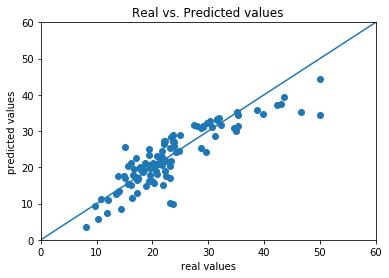

In [23]:
plt.scatter(y_test, 
              y_test_pred)
plt.xlim(0,60)
plt.ylim(0,60)
plt.plot([0,60],
         [0,60])
plt.title('Real vs. Predicted values')
plt.xlabel('real values')
plt.ylabel('predicted values')

### Calculate the metrics

In [24]:
r2_score(y_test,y_test_pred)

0.7553533494102489

In [25]:
mean_squared_error(y_test,y_test_pred)

17.643141305185665

#  
#  
#  Basic model with statsmodule

### Create the model

In [26]:
# NOTE: The variables are now parameters of the model

model = sm.OLS(y_train, X_train)

### Fit the model

In [27]:
# NOTE: the variables are not here!

model = model.fit() 

### Calculate the predictions

In [28]:
y_test_pred = model.predict(X_test)

### Plot the predictions

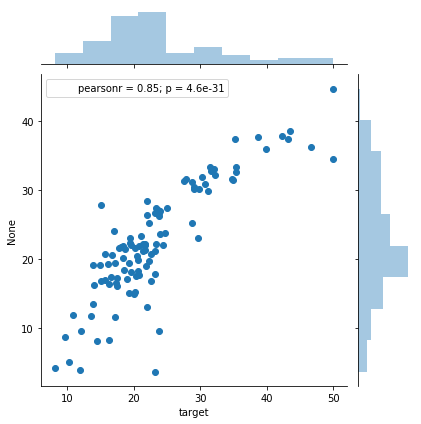

In [29]:
sns.jointplot(y_test, y_test_pred)

### Print the summary

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     666.9
Date:                Tue, 20 Mar 2018   Prob (F-statistic):          1.25e-255
Time:                        11:41:43   Log-Likelihood:                -1211.9
No. Observations:                 400   AIC:                             2450.
Df Residuals:                     387   BIC:                             2502.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0826      0.036     -2.294      0.022      -0.153      -0.012
ZN             0.0498      0.018      2.844      0.005       0.015       0.084
INDUS          0.0327      0.078      0.421      0.674      -0.120       0.185
CHAS           2.4574      1.119      2.196      0.029       0.257       4.658
NOX           -2.5468      3.859     -0.660      0.510     -10.133       5.040
RM             6.0247      0.357     16.863      0.000       5.322       6.727
AGE           -0.0005      0.016     -0.031      0.975      -0.032       0.031
DIS           -0.9070      0.220     -4.121      0.000      -1.340      -0.474
RAD            0.1492      0.077      1.926      0.055      -0.003       0.301
TAX           -0.0095      0.005     -2.046      0.041      -0.019      -0.000
PTRATIO       -0.4507      0.125     -3.602      0.000      -0.697      -0.205
B              0.0142      0.003      4.800      0.000       0.008       0.020
LSTAT         -0.4534      0.061     -7.478      0.000      -0.573      -0.334
==============================================================================
Omnibus:                      182.351   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1384.499
Skew:                           1.770   Prob(JB):                    2.29e-301
Kurtosis:                      11.399   Cond. No.                     8.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""